In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Inspect Data

In [2]:
data = pd.read_csv('all_data.csv')
data.describe().round(3)

C:\Users\sangd\AppData\Local\Temp\ipykernel_12600\1977694747.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_data.csv')


id       host_id    latitude   longitude       price  \
count  2.764110e+05  2.764110e+05  276411.000  276411.000  234923.000   
mean   4.293345e+17  1.811940e+08      34.501    -105.899     272.444   
std    4.442696e+17  1.769591e+08       7.028      26.432     893.276   
min    6.000000e+00  2.300000e+01      18.920    -159.715       5.000   
25%    3.274332e+07  2.692495e+07      30.282    -118.636      99.000   
50%    5.440883e+07  1.081869e+08      34.490    -114.926     159.000   
75%    8.715867e+17  3.317395e+08      40.685     -80.141     271.000   
max    1.160946e+18  5.774373e+08      47.734     -70.996  100000.000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      276411.000         276411.000         214920.000   
mean           14.152             42.779              1.537   
std            27.133             85.405              1.801   
min             1.000              0.000              0.010   
25%             1.000              1.000              0.280   
50%             3.000              9.000              0.970   
75%            30.000             45.000              2.260   
max          1250.000           3599.000             88.950   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                      276411.000        276411.000             276411.000  
mean                           33.294           186.032                 10.667  
std                            95.841           129.622                 18.645  
min                             1.000             0.000                  0.000  
25%                             1.000            65.000                  0.000  
50%                             3.000           190.000                  2.000  
75%                            16.000           309.000                 14.000  
max                           837.000           365.000               1049.000

In [3]:
total_nan = data.isnull().sum()
print('total nan value:', total_nan)

total nan value: id                                     0
name                                   3
host_id                                0
host_name                             15
neighbourhood_group               147456
neighbourhood                        928
latitude                               0
longitude                              0
room_type                              0
price                              41488
minimum_nights                         0
number_of_reviews                      0
last_review                        61491
reviews_per_month                  61491
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           176826
city                                   0
dtype: int64


we're not gonna use name or neighborhood columns. I think we should drop observations that NaN for `price` column. For last_review and reviews_per_month, probably these listings are too new and never been rent, so we can set these to 0

In [4]:
# Remove rows with NaN in 'price' column
data = data.dropna(subset=['price'])
# Set NaN values in 'last_review' and 'reviews_per_month' to 0
data.fillna({'last_review': 0, 'reviews_per_month':0}, inplace=True)
total_nan = data.isnull().sum()
print('total nan value:', total_nan)

total nan value: id                                     0
name                                   0
host_id                                0
host_name                              6
neighbourhood_group               132127
neighbourhood                        846
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                            0
reviews_per_month                      0
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           143456
city                                   0
dtype: int64


In [5]:
for c in data.columns:
    print(f"Column: {c:<20} | # unique values: {np.ma.count(data[c].unique()):<9} | dtype: {type(data[c][1000])}")

Column: id                   | # unique values: 234922    | dtype: <class 'numpy.int64'>
Column: name                 | # unique values: 212678    | dtype: <class 'str'>
Column: host_id              | # unique values: 104510    | dtype: <class 'numpy.int64'>
Column: host_name            | # unique values: 27797     | dtype: <class 'str'>
Column: neighbourhood_group  | # unique values: 35        | dtype: <class 'float'>
Column: neighbourhood        | # unique values: 1468      | dtype: <class 'str'>
Column: latitude             | # unique values: 186298    | dtype: <class 'numpy.float64'>
Column: longitude            | # unique values: 187711    | dtype: <class 'numpy.float64'>
Column: room_type            | # unique values: 4         | dtype: <class 'str'>
Column: price                | # unique values: 2544      | dtype: <class 'numpy.float64'>
Column: minimum_nights       | # unique values: 148       | dtype: <class 'numpy.int64'>
Column: number_of_reviews    | # unique values: 957  

# dropping columns that I think not neccessary for now. please read README.md and consider `city` and `last_review`

In [6]:
data2 = data.drop(columns=['id','name','host_id','host_name','neighbourhood_group', 'neighbourhood','license', 'city', 'last_review'])
print(data2.columns)
data2.describe()

Index(['latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')


latitude      longitude          price  minimum_nights  \
count  234923.000000  234923.000000  234923.000000   234923.000000   
mean       34.278106    -107.195859     272.444163       12.555752   
std         7.182372      26.415946     893.275910       22.842342   
min        18.920250    -159.714620       5.000000        1.000000   
25%        30.255594    -121.912466      99.000000        1.000000   
50%        34.174303    -115.163680     159.000000        2.000000   
75%        40.650782     -80.313660     271.000000       30.000000   
max        47.734087     -70.996000  100000.000000     1100.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count      234923.000000      234923.000000                   234923.000000   
mean           46.966270           1.331212                       34.922885   
std            89.798998           1.779040                       98.099459   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.090000                        1.000000   
50%            11.000000           0.680000                        3.000000   
75%            52.000000           2.030000                       18.000000   
max          3599.000000          88.950000                      837.000000   

       availability_365  number_of_reviews_ltm  
count     234923.000000          234923.000000  
mean         210.653916              12.089523  
std          117.268035              19.538720  
min            0.000000               0.000000  
25%          104.000000               0.000000  
50%          232.000000               3.000000  
75%          321.000000              17.000000  
max          365.000000            1049.000000

# Convert room_type into integer values

In [7]:
print(data2['room_type'].unique())
room_type_dict = {'Entire home/apt':0, 'Private room':1, 'Shared room':2, 'Hotel room':3} # might be changed later
data2['room_type'] = data2['room_type'] .replace(room_type_dict)
print(data2['room_type'].unique())


['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
[0 1 2 3]


C:\Users\sangd\AppData\Local\Temp\ipykernel_12600\3723430944.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['room_type'] = data2['room_type'] .replace(room_type_dict)


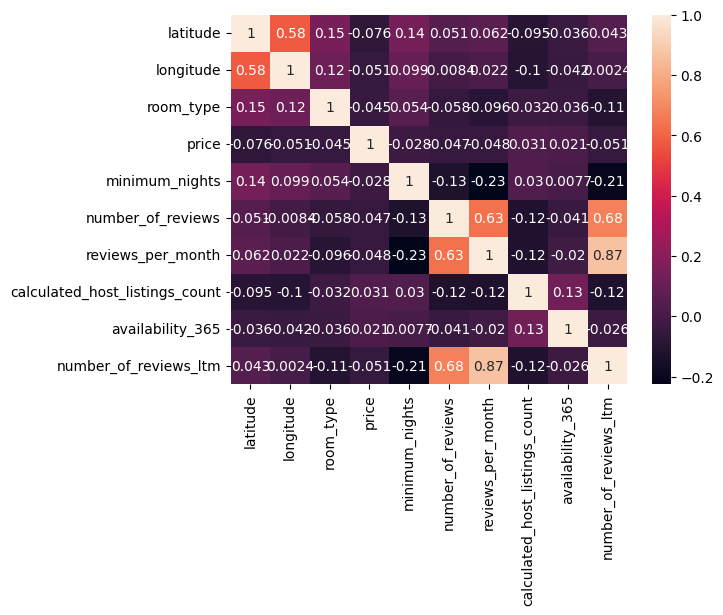

In [7]:
sns.heatmap(data2.corr(), annot=True)
plt.show()

It makes sense that `longtitude` and `lattitude` are quite correlated, the number would increase if we only do either east coast or west coast cities. We're doing the ~35 cities in the USA tho. It also expected that `number_of_reviews`, `reviews_per_month`, and `number_of_reviews_ltm` are closely correlated.

# Consider:
Normalize standardize data so the correlation is more obvious

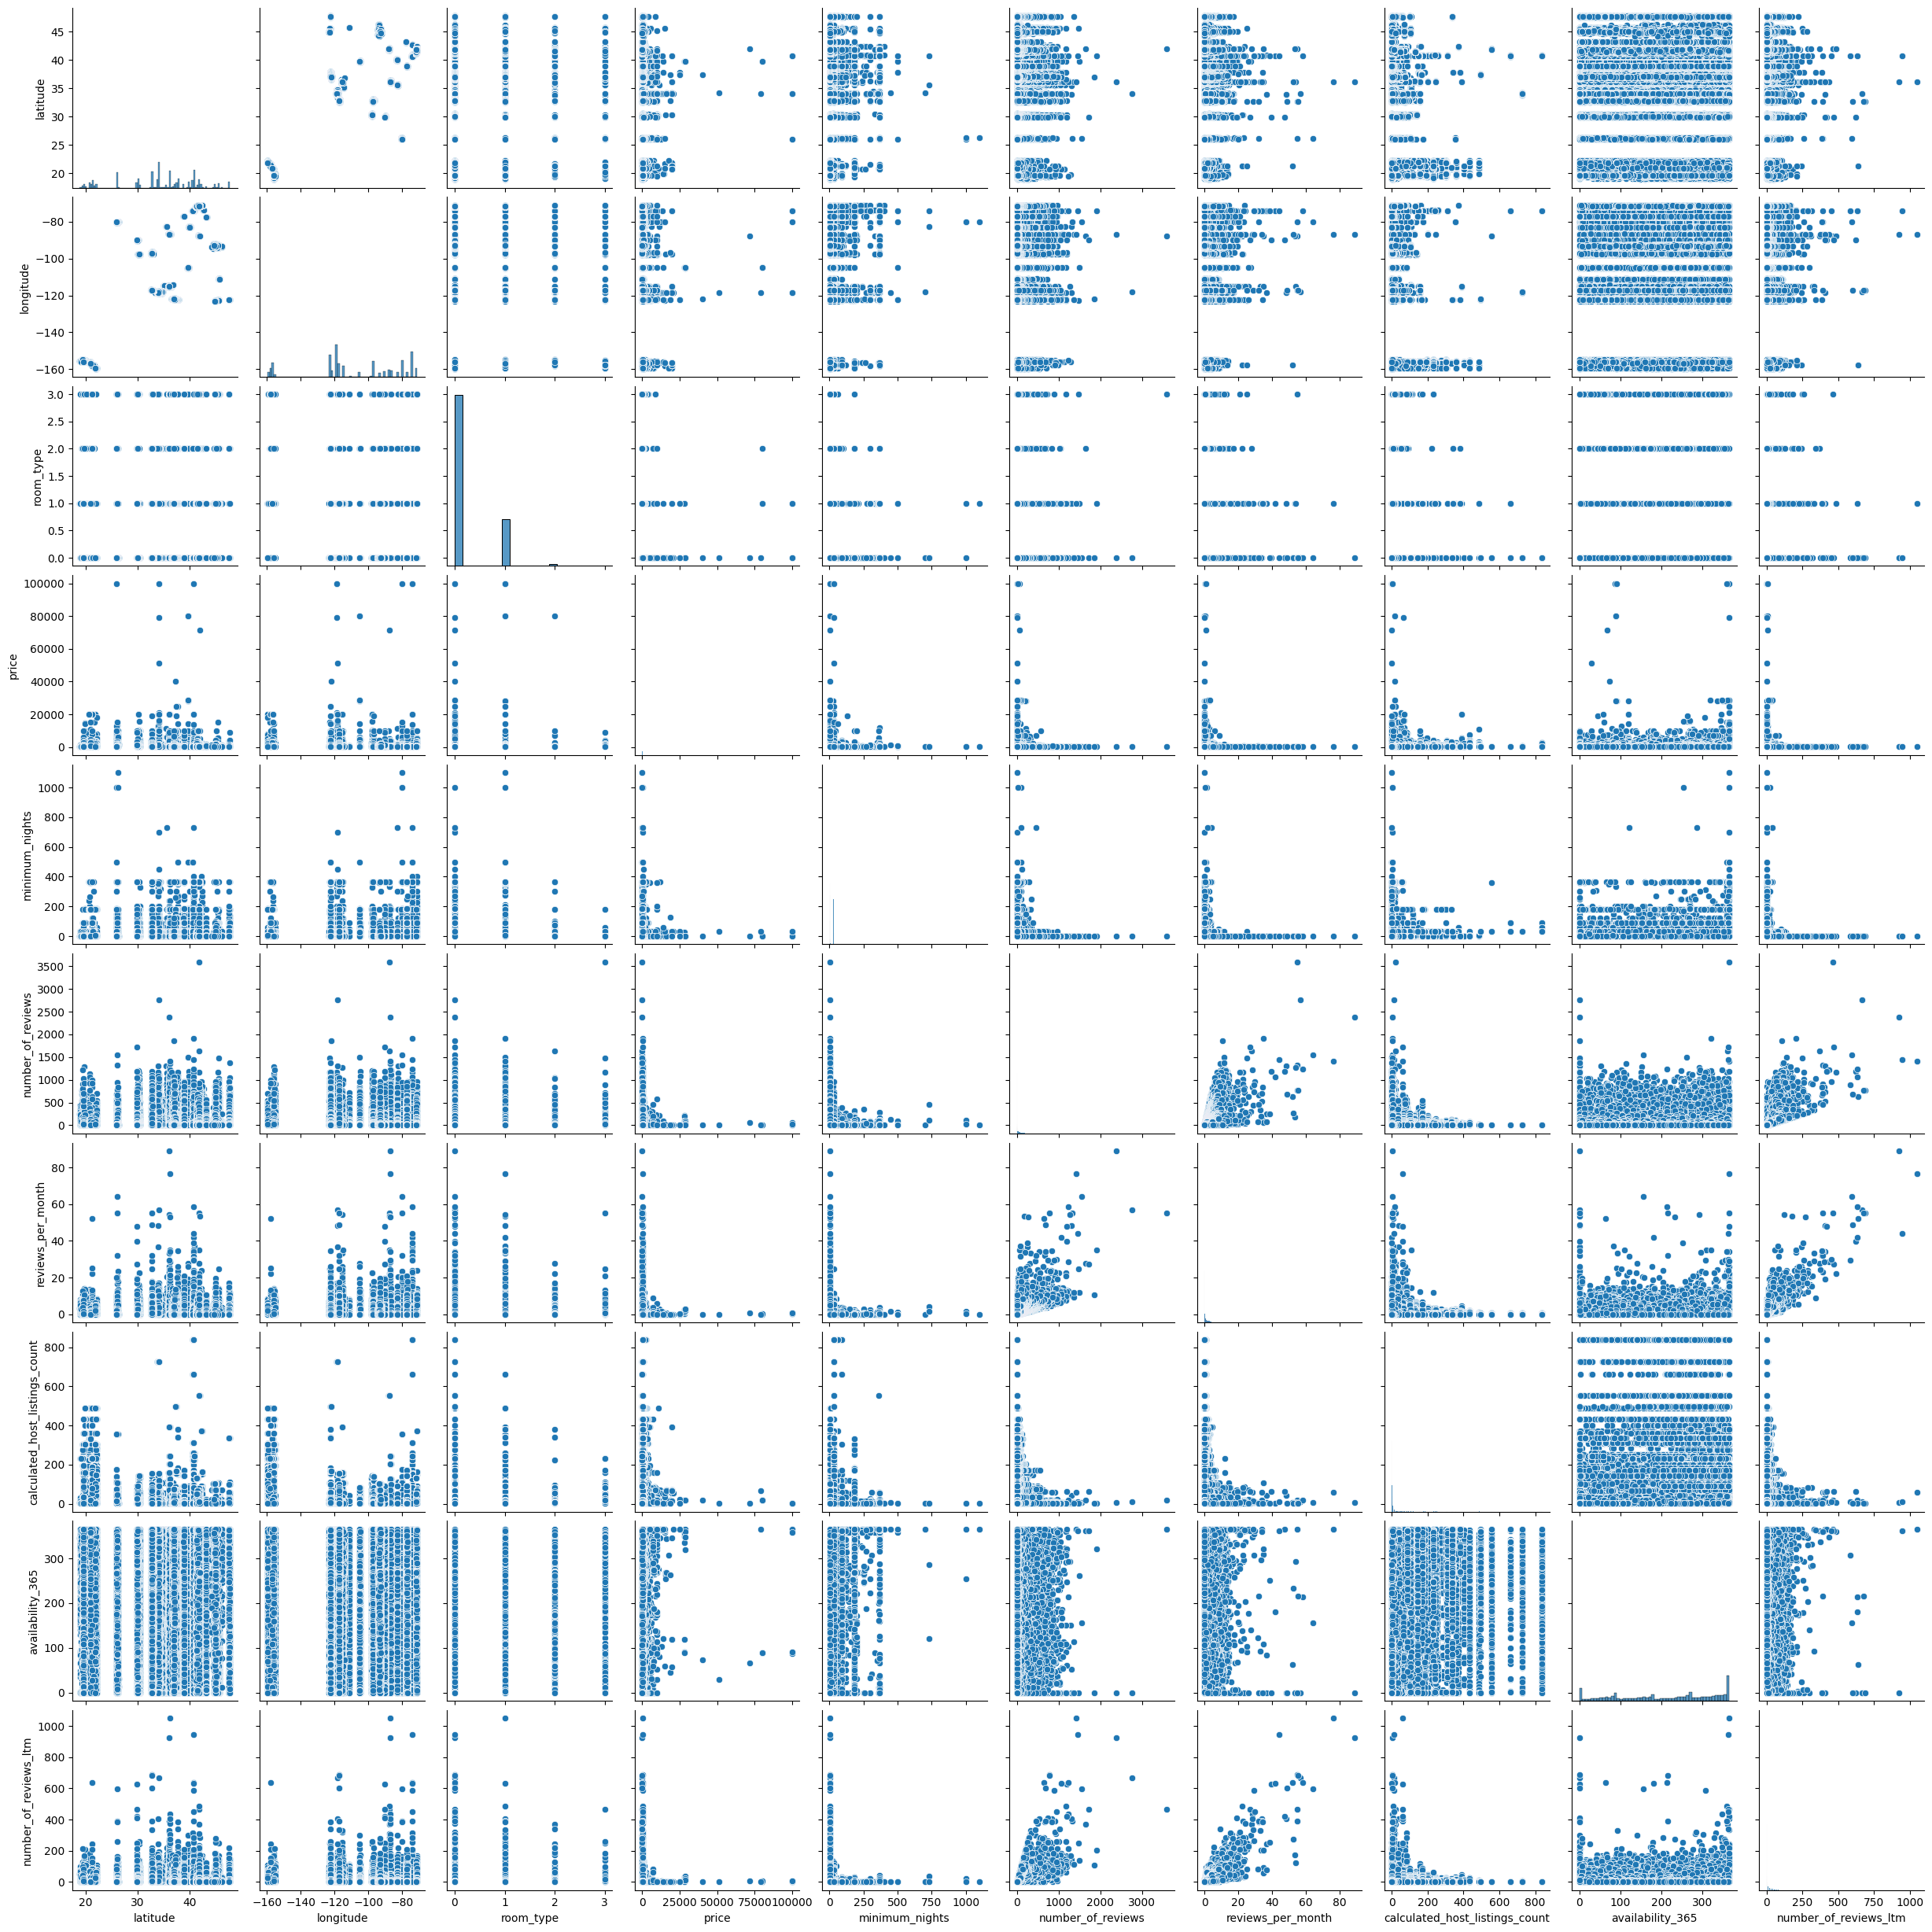

In [16]:
sns.pairplot(data2)

Consider: remove the outliners and abnomalities so the plots are not so squeezed. Someone in group can analyze original data, while other can analyze the data without outliners

In [27]:
# https://medium.com/analytics-vidhya/removing-outliers-understanding-how-and-what-behind-the-magic-18a78ab480ff
# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns, th1=0.01, th3=0.90, multiplier=1.5):
    for column in columns:
        Q1 = df[column].quantile(th1)
        Q3 = df[column].quantile(th3)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        print(f"column: {column}, lower_bound: {lower_bound}, upper_bound: {upper_bound}")
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df
# consider: Removing Outliers using Standard Deviation (probably not good because data is not normally distributed)
# data2 columns: 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365','number_of_reviews_ltm'
test_df = remove_outliers_iqr(data2, ['price', 'number_of_reviews_ltm', 'minimum_nights', 'calculated_host_listings_count'], multiplier=1)
test_df.describe()

column: price, lower_bound: -416.0, upper_bound: 931.0
column: number_of_reviews_ltm, lower_bound: -37.0, upper_bound: 74.0
column: minimum_nights, lower_bound: -28.0, upper_bound: 59.0
column: calculated_host_listings_count, lower_bound: -75.0, upper_bound: 153.0


latitude      longitude      room_type          price  \
count  206811.000000  206811.000000  206811.000000  206811.000000   
mean       34.632150    -105.852183       0.240543     201.390970   
std         6.897093      25.196243       0.460419     157.203081   
min        18.920250    -159.714620       0.000000       5.000000   
25%        30.318757    -118.504500       0.000000      96.000000   
50%        34.250370    -115.090280       0.000000     151.000000   
75%        40.657335     -80.331600       0.000000     250.000000   
max        47.734087     -70.996000       3.000000     931.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   206811.000000      206811.000000      206811.000000   
mean        10.729221          46.955873           1.350066   
std         12.954278          80.544182           1.521359   
min          1.000000           0.000000           0.000000   
25%          1.000000           2.000000           0.140000   
50%          2.000000          14.000000           0.810000   
75%         30.000000          56.000000           2.130000   
max         59.000000        1168.000000          35.000000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                   206811.000000     206811.000000          206811.000000  
mean                        13.473572        206.844472              11.887119  
std                         24.905806        116.990859              15.766550  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         96.000000               0.000000  
50%                          3.000000        222.000000               4.000000  
75%                         12.000000        316.000000              19.000000  
max                        153.000000        365.000000              74.000000

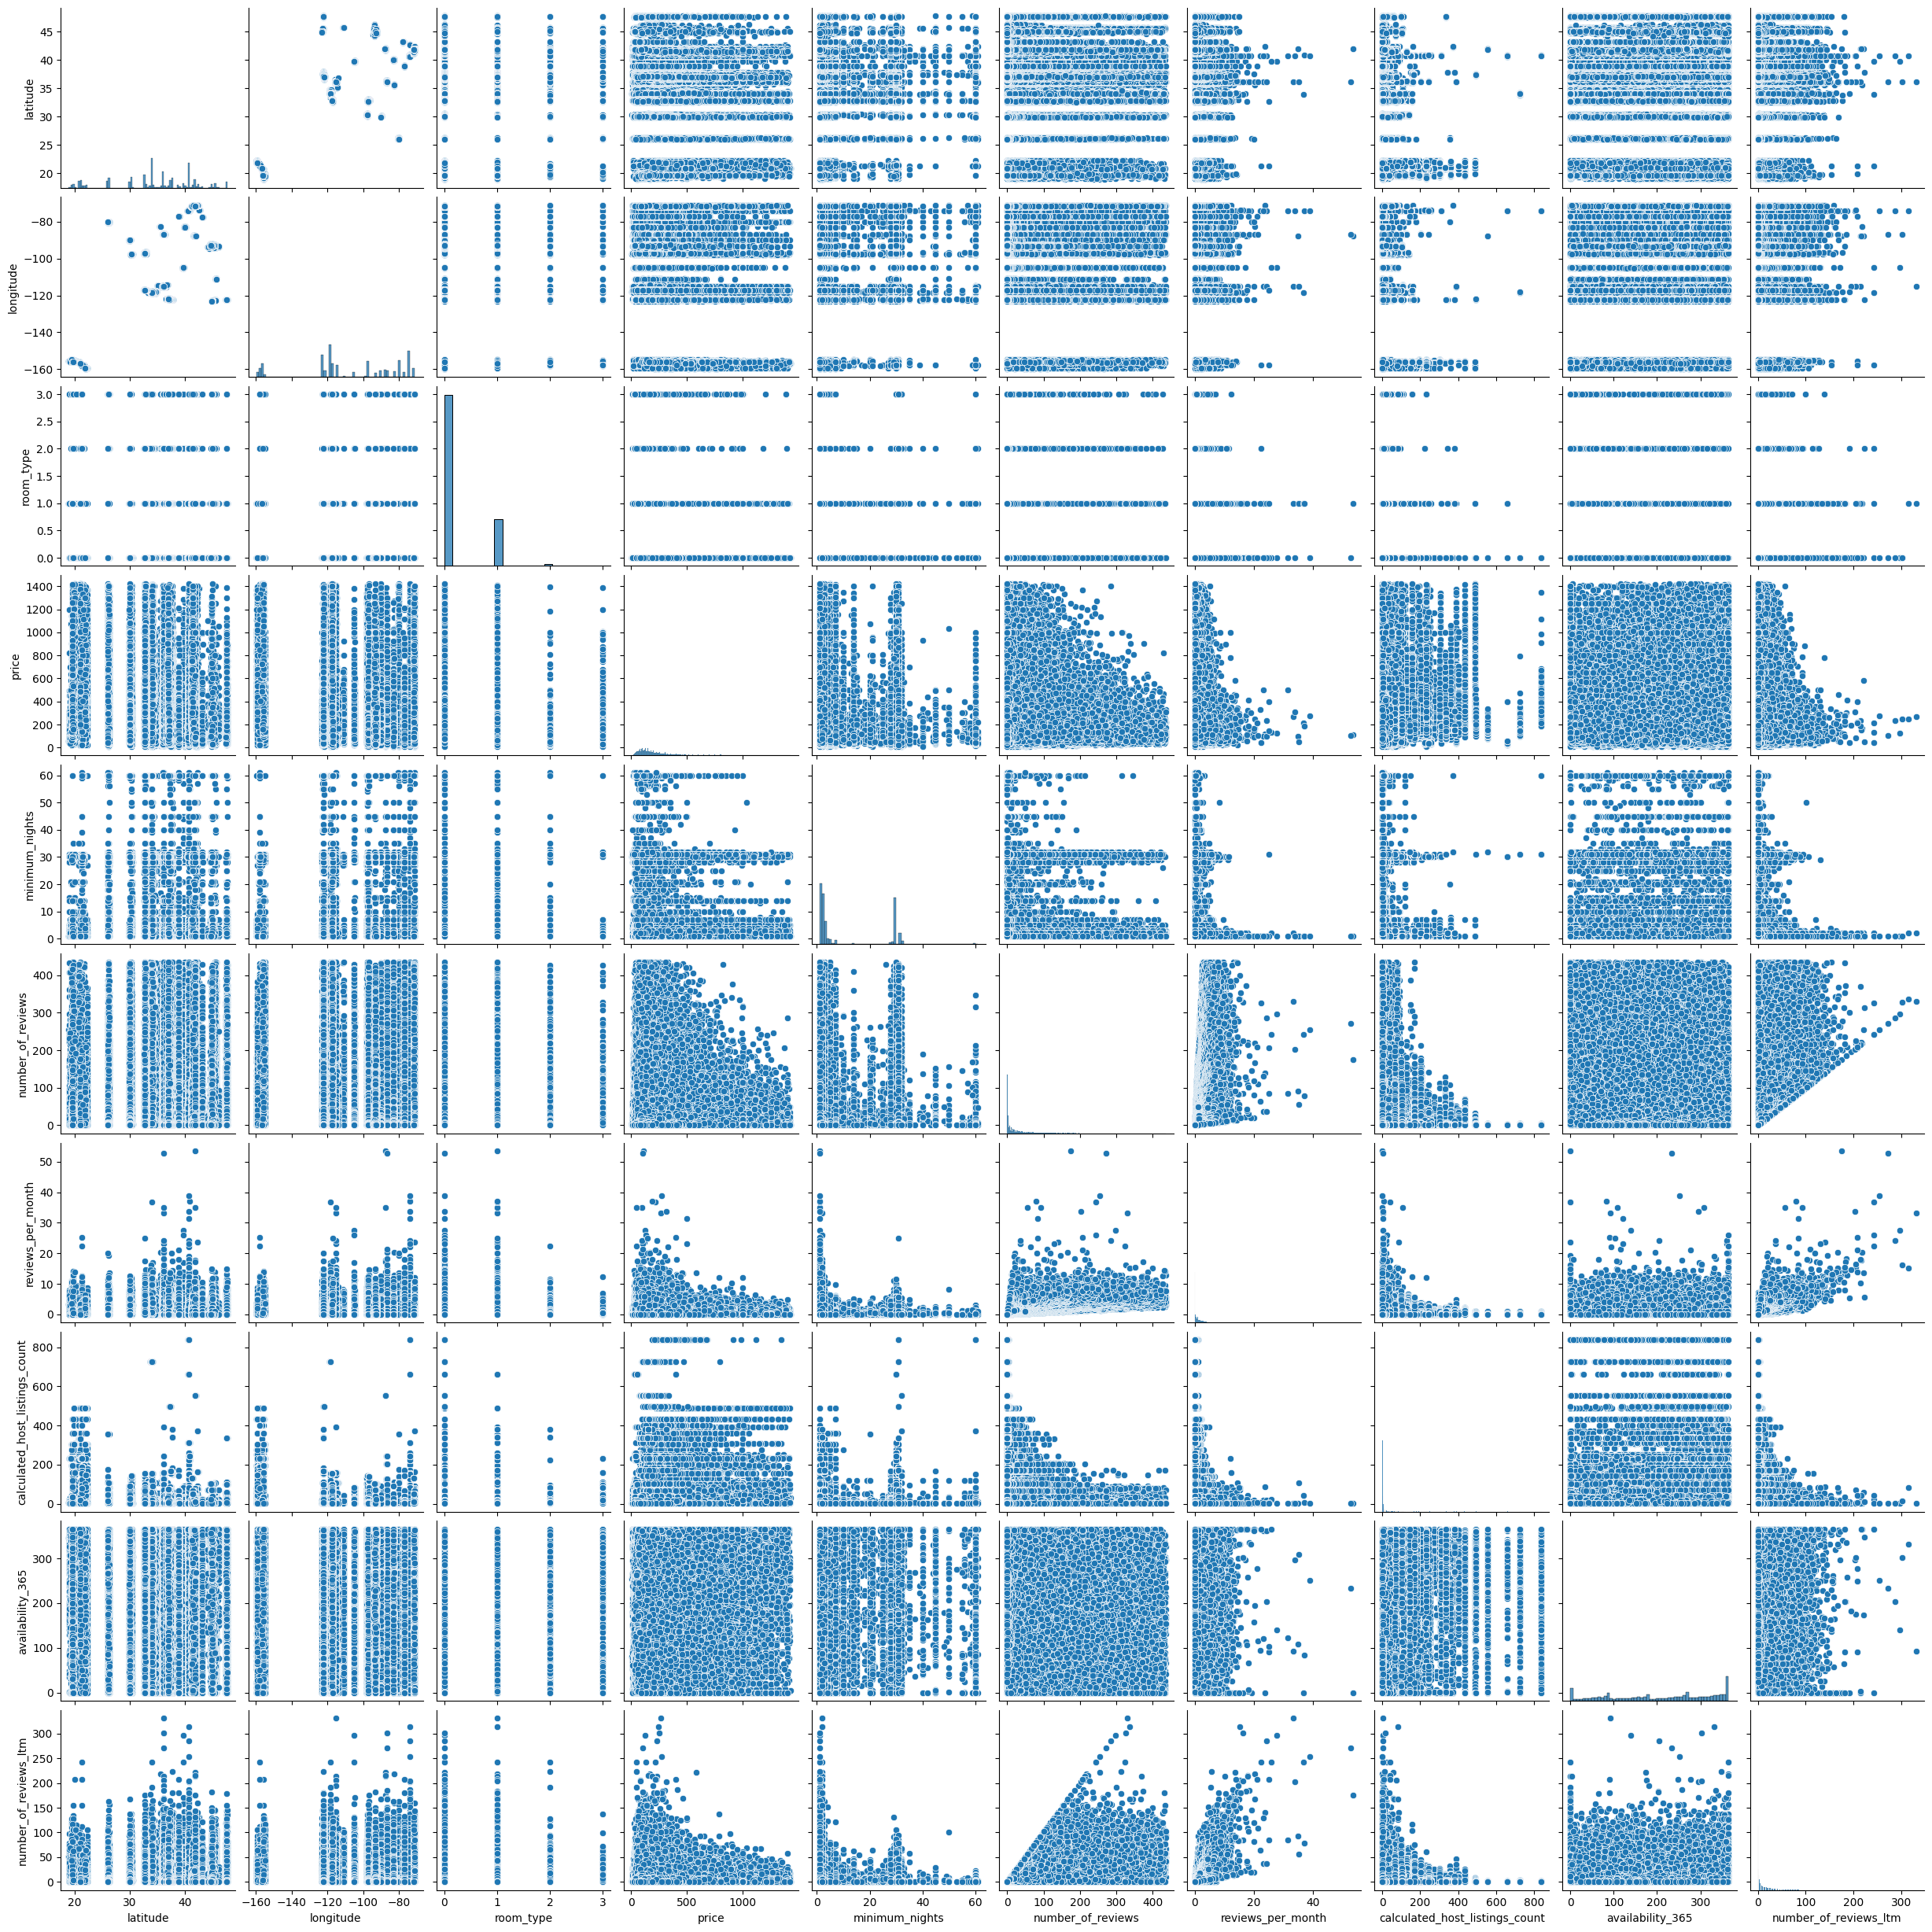

In [24]:
sns.pairplot(test_df)

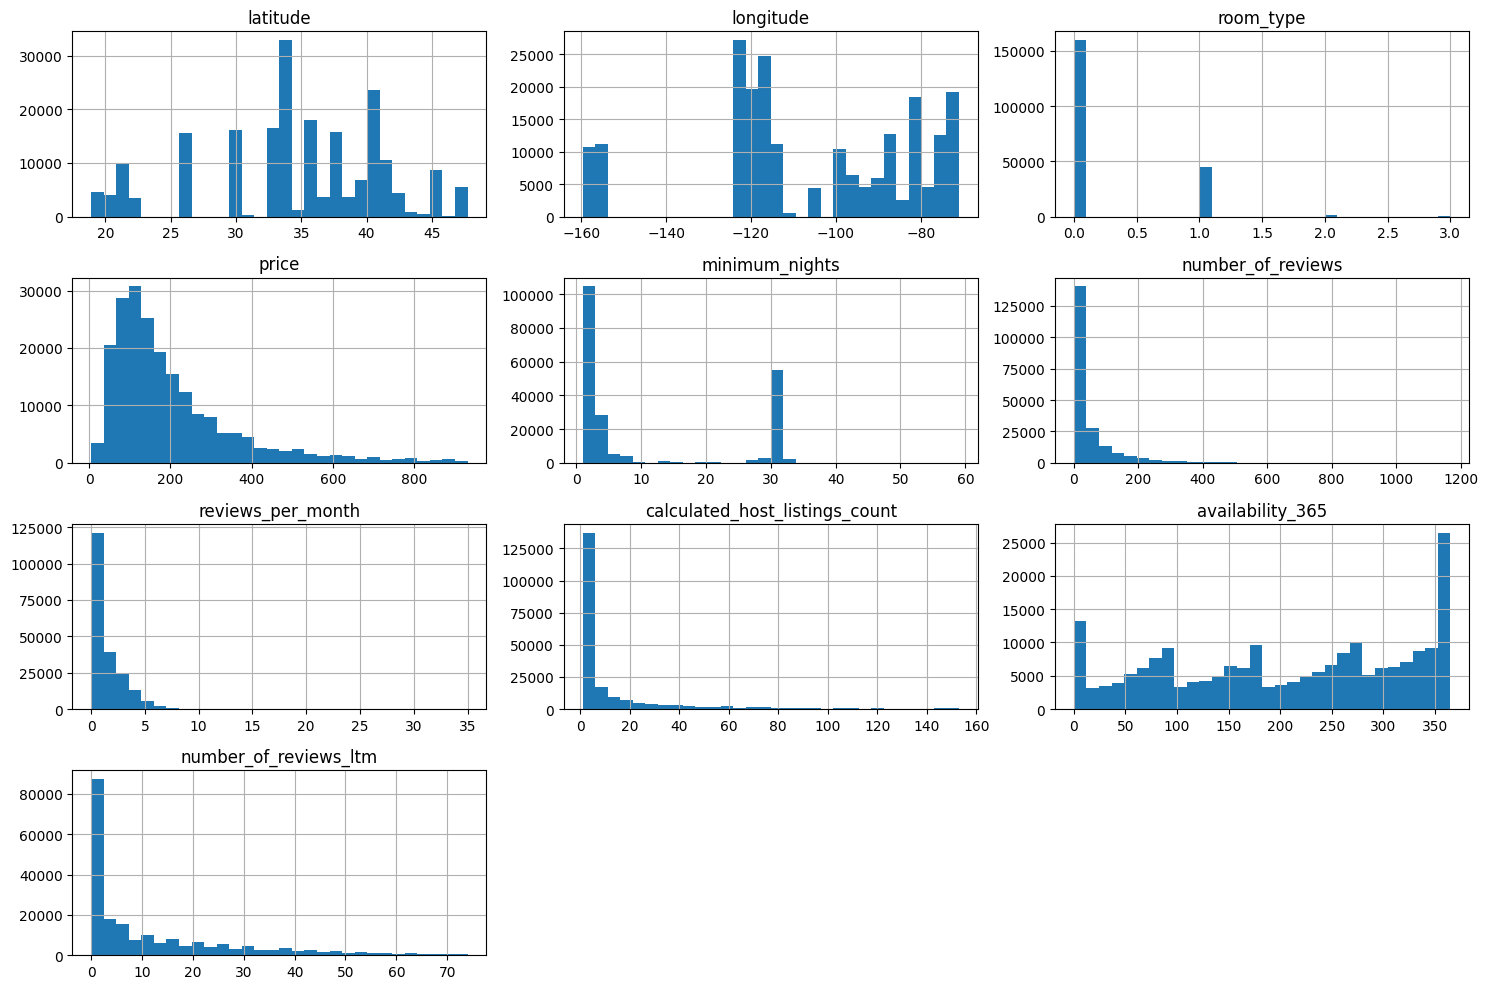

In [13]:
test_df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

## Explore for Unsupervised Learning

What are we looking for? Ideas:
  1. There are lots of information (for examples, number of beds, baths, distance to attraction, pets allow...) in `name`. We can create a tokens/keywords list, use cluster to see how keywords are related in term of pricing, room type, locations, ...
  2. create new column `income` which is calculated by `price` and `reviews_per_month`. Then assign each observation into groups, maybe 4 groups: `low_income` if `income<=500`> , `medium_income` if `income<=2000`>, `high_income`, `super_high_income`. Again, run PCA and clustering to see if there's an underline pattern that put an observation into its income group. 
For now, we perfom PCA on the dataset with sklearn. With further thinking, we may drop or re-add columns, and we'll decide and apply clustering on chosen idea.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)

def pca_2dplot(pca, df, scores):
    # biplot. source: Introduction to Statistical Learning https://github.com/intro-stat-learning/ISLP_labs
    i, j = 0, 1 # which components
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    point_size = 0.2  # Adjust this value to make the points smaller or larger
    vector_scale = 5

    ax.scatter(scores[:,0], scores[:,1], s=point_size)
    ax.set_xlabel('PC%d' % (i+1))
    ax.set_ylabel('PC%d' % (j+1))
    for k in range(pca.components_.shape[1]):
        ax.arrow(0, 0, pca.components_[i,k]*vector_scale, pca.components_[j,k]*vector_scale)
        # print(data2.columns[k], f'(i,k)={i},{k}, (j,k)={j},{k}',  pca.components_[i,k], pca.components_[j,k])
        ax.text(pca.components_[i,k]*vector_scale,
                pca.components_[j,k]*vector_scale,
                data2.columns[k])
    plt.show()

def pca_3dplot(pca,df,scores):
    i, j, k = 0, 1, 2  # which components for 3D plot

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Set the size of the points
    point_size = 0.1  # Adjust this value to make the points smaller or larger
    vector_scale = 0.12


    # 3D scatter plot with adjusted point size
    # ax.scatter(scores[:, i], scores[:, j], scores[:, k], s=point_size)

    ax.set_xlabel('PC%d' % (i + 1))
    ax.set_ylabel('PC%d' % (j + 1))
    ax.set_zlabel('PC%d' % (k + 1))

    for l in range(pca.components_.shape[1]):
        ax.quiver(0, 0, 0, pca.components_[i, l], pca.components_[j, l], pca.components_[k, l], length=0.1, color='r')
        # print(data2.columns[l], f'(i,l)={i},{l}, (j,l)={j},{l}, (k,l)={k},{l}',  pca.components_[i, l], pca.components_[j, l], pca.components_[k, l])
        ax.text(pca.components_[i, l]*vector_scale, pca.components_[j, l]*vector_scale, pca.components_[k, l]*vector_scale, df.columns[l])

    plt.show()

def pca_function(df):

    print(f"df means:\n{test_df.mean()}\n\ndf variance:\n{test_df.var()}")

    # scaler
    scaler = StandardScaler(with_std=True, with_mean=True)
    scaled_data = scaler.fit_transform(test_df)

    # check for NaN value
    has_nan = np.isnan(scaled_data).sum()
    print(f"Array has NaN values: {has_nan}")
    nan_indices = np.argwhere(np.isnan(scaled_data))
    print("Indices of NaN values:")
    print(nan_indices)

    # PCA
    pca = PCA()
    pca.fit(scaled_data)
    print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

    scores = pca.transform(scaled_data)
    print('PCA components_: ', pca.components_.shape)

    pca_2dplot(pca,df, scores)
    pca_3dplot(pca, df, scores)

df means:
latitude                           34.632150
longitude                        -105.852183
room_type                           0.240543
price                             201.390970
minimum_nights                     10.729221
number_of_reviews                  46.955873
reviews_per_month                   1.350066
calculated_host_listings_count     13.473572
availability_365                  206.844472
number_of_reviews_ltm              11.887119
dtype: float64

df variance:
latitude                             47.569888
longitude                           634.850681
room_type                             0.211985
price                             24712.808657
minimum_nights                      167.813318
number_of_reviews                  6487.365201
reviews_per_month                     2.314534
calculated_host_listings_count      620.299184
availability_365                  13686.860986
number_of_reviews_ltm               248.584100
dtype: float64
Array has NaN values: 0
In

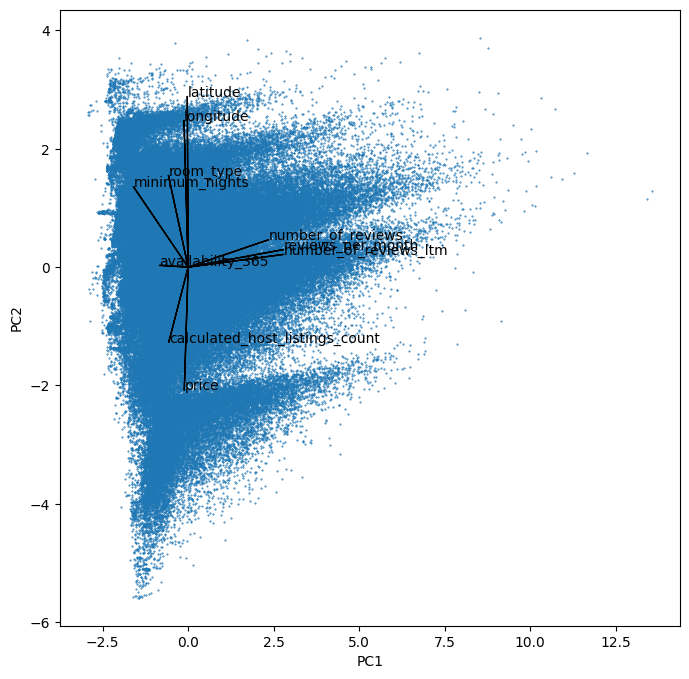

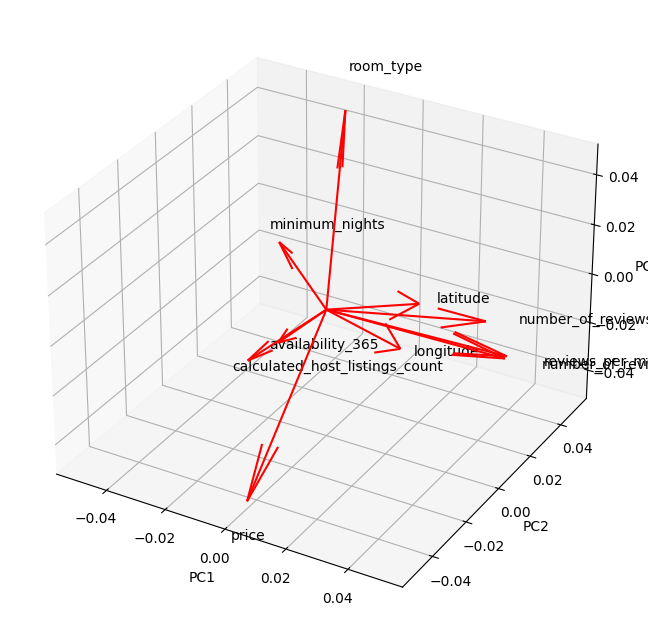

df means:
latitude                           34.632150
longitude                        -105.852183
room_type                           0.240543
price                             201.390970
minimum_nights                     10.729221
number_of_reviews                  46.955873
reviews_per_month                   1.350066
calculated_host_listings_count     13.473572
availability_365                  206.844472
number_of_reviews_ltm              11.887119
dtype: float64

df variance:
latitude                             47.569888
longitude                           634.850681
room_type                             0.211985
price                             24712.808657
minimum_nights                      167.813318
number_of_reviews                  6487.365201
reviews_per_month                     2.314534
calculated_host_listings_count      620.299184
availability_365                  13686.860986
number_of_reviews_ltm               248.584100
dtype: float64
Array has NaN values: 0
In

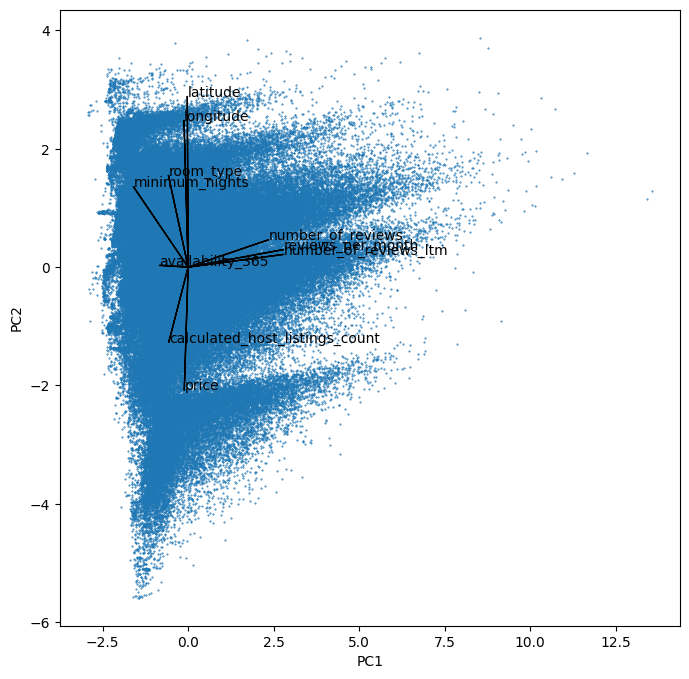

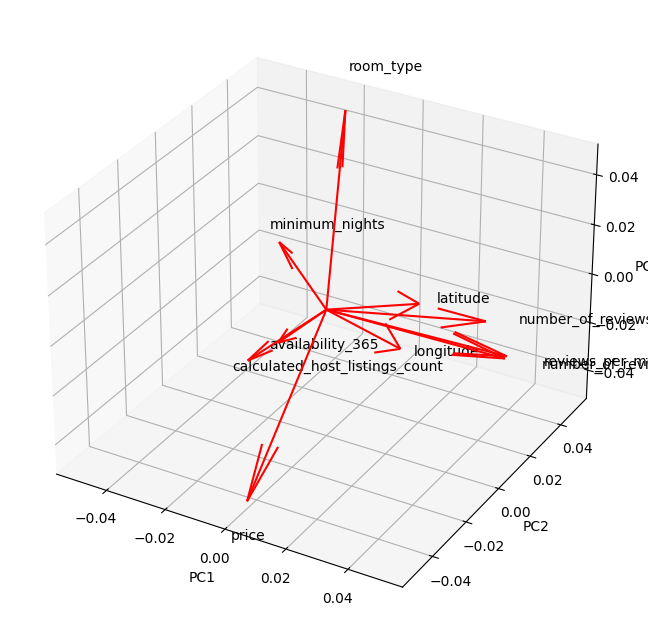

In [29]:
pca_function(data2)
pca_function(test_df)

Text(0, 0.5, 'Proportion of Variance Explained')

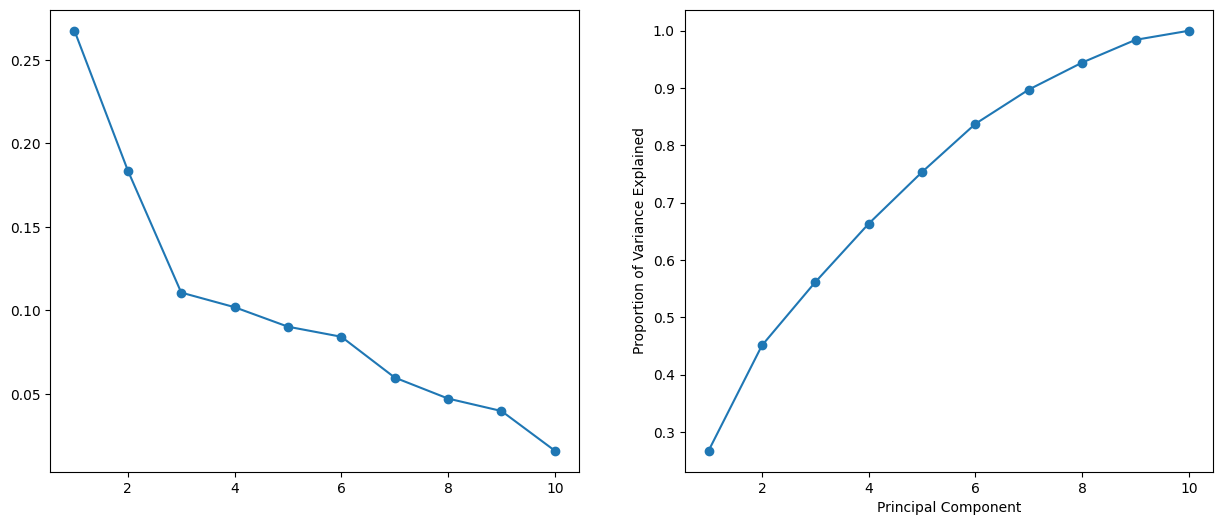

In [35]:
    # scaler
scaler = StandardScaler(with_std=True, with_mean=True)
scaled_data = scaler.fit_transform(test_df)

# PCA
pca = PCA()
pca.fit(scaled_data)
# print('PCA means: ', pca.mean_)  # means should be 0 after scaler()?

scores = pca.transform(scaled_data)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        pca.explained_variance_ratio_,
        marker='o')

ax = axes[1]
ax.plot(ticks,
        pca.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Variance Explained')


